In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randrange
import time


In [3]:
data = pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv")

In [4]:
#giving index to each column
data.columns = list(range(785))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#x has the grayscale values
#y has the labels
x = data.iloc[:,1:]
y = data.iloc[:,0:1]
print(x.shape)
print(y.shape)

(372450, 784)
(372450, 1)


[0, 1, 2]
[45784, 141283, 266446]


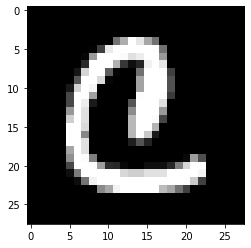

In [6]:
#visualising the 784 pixel image
#we randomly generate 3 numbers in range of the length of the dataframe and the image at that index is plotted
arr = [i for i in range(3)]
print(arr)
for i in range(3) :
  n = random.randint(0,len(x))
  arr[i] = n
print(arr) 
plt.imshow(x.iloc[arr[0]].to_numpy().reshape(28,28), cmap=plt.get_cmap('gray'))

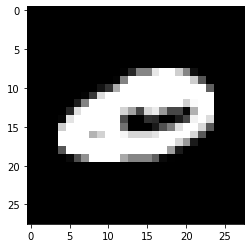

In [7]:
plt.imshow(x.iloc[arr[1]].to_numpy().reshape(28,28), cmap=plt.get_cmap('gray'))

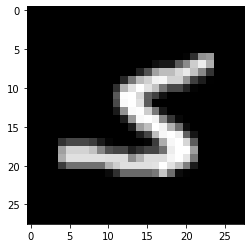

In [8]:
plt.imshow(x.iloc[arr[2]].to_numpy().reshape(28,28), cmap=plt.get_cmap('gray'))

In [9]:
#testtrainsplit

lenoftest = int(0.1*len(data)) 

indext = random.sample(range(1, len(data)), lenoftest) 
testData = data.iloc[indext] 

trainData = data.drop(data.index[indext])

print("test data dim = ", testData.shape)
print("train data dim = ", trainData.shape)



test data dim =  (37245, 785)
train data dim =  (335205, 785)


In [10]:
#calculate prior
def prior(i):
    count = np.count_nonzero(trainData.iloc[:,0]==i)
    samples = len(trainData.iloc[:,0])
    prior = count / samples
    return prior

#the array will store all the prior values of each label
priors = [i for i in range(26)]
#print(priors)
for i in range(26):
  priors[i] = prior(i)
#priors stores the values of probabilities of each label
print(priors)


[0.037338345191748334, 0.023239510150504916, 0.06309571754597933, 0.027251980131561285, 0.030646917557912323, 0.003093629271639743, 0.015554660580838592, 0.019346370131710446, 0.0029623663131516536, 0.022780089795796602, 0.015119106218582659, 0.03103175668620695, 0.03320057875031697, 0.051138855327337, 0.15534076162348415, 0.05207857878014946, 0.01556957682612133, 0.030942259214510524, 0.12989961366924718, 0.06017809996867589, 0.07779418564758879, 0.01120210020733581, 0.02896138184096299, 0.016831491177040914, 0.0290120970749243, 0.016389970316671887]


In [20]:
bins = [*range(0,256+1,64)]
# setting column with class lable as index to do slicing of dataframe
try:
    trainData = trainData.set_index([0])
except:
    print('index for slicing dataTrain already set!')


# declare a matrix to store all calculated probabilities
likelihood = np.zeros((784,4,26))

for i in range(0,784):
    for j in range(0,4):
        for k in range(0,26):
            datai = trainData.xs(k)
            val = (sum(datai.iloc[:,i].between(bins[j], bins[j+1]-1, inclusive=True))+1)/(len(datai)+4)
            likelihood[i,j,k] = val
    print(i)    


index for slicing dataTrain already set!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
testLen = len(testData)
predict = np.zeros((testLen))


row = 0
count = np.zeros((26))
while row < testLen:
    for x in range(26):
        count[x] = np.log(priors[x])
    for y in range(1,785):
        temp = testData.iloc[row,y]
        for z in range(4):
            if temp in range(bins[z],bins[z+1]):
                for m in range(26):
                    count[m] += np.log(likelihood[y-1,z,m])
                #print(z,count)
                break
    predict[row] = int(np.argmax(count))
    row += 1
    print(row)

Streaming output truncated to the last 5000 lines.
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
32330
32331
32332
32333
32334
32335
32336
32337
32338
32339
32340
32341
32342
32343
32344
32345
32346
32347
32348
32349
32350
32351
32352
32353
32354
32355
32356
32357
32358
32359
32360
32361
32362
32363
32364
32365
32366
32367
32368
32369
32370
32371
32372
32373
32374
32375
32376
32377
32378
32379
32380
32381
32382
32383
32384
32385
32386
32387
32388
32389
32390
32391
32392
32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
3

In [26]:
groundTruth = sum(predict[0:len(data)]==testData.iloc[:,0])
accuracy = (groundTruth/len(testData))*100
print('accuracy of the classiefier is : ',accuracy)
confusionMatrix = np.zeros((26,26))

for i in range(len(testData)):
    if predict[i]==testData.iloc[i,0]:
        confusionMatrix[testData.iloc[i,0],testData.iloc[i,0]] += 1
    else:
        confusionMatrix[testData.iloc[i,0],int(predict[i])] +=1
        
print(confusionMatrix)

accuracy of the classiefier is :  71.06725734997987
[[9.820e+02 2.300e+01 0.000e+00 0.000e+00 3.000e+00 0.000e+00 1.400e+01
  5.700e+01 0.000e+00 3.000e+00 1.400e+01 0.000e+00 6.500e+01 4.000e+01
  3.000e+00 1.400e+01 1.600e+01 3.800e+01 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 1.400e+01 2.800e+01 3.700e+01 0.000e+00]
 [2.800e+01 6.540e+02 6.000e+00 2.400e+01 1.700e+01 0.000e+00 7.000e+00
  1.800e+01 1.000e+00 2.000e+01 2.000e+00 1.000e+00 5.000e+00 7.000e+00
  1.200e+01 8.000e+00 5.000e+00 6.000e+00 1.200e+01 0.000e+00 1.000e+00
  0.000e+00 3.000e+00 2.000e+00 1.000e+01 2.900e+01]
 [0.000e+00 4.500e+01 1.619e+03 5.000e+00 8.000e+01 3.000e+00 1.900e+01
  2.000e+00 0.000e+00 1.200e+01 2.000e+01 1.040e+02 1.600e+01 1.900e+01
  1.270e+02 4.900e+01 1.700e+01 5.000e+00 0.000e+00 1.000e+01 2.900e+01
  0.000e+00 6.800e+01 0.000e+00 6.000e+00 4.000e+00]
 [8.000e+00 3.800e+01 8.000e+00 6.820e+02 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 4.200e+01 0.000e+00 2.000e+00 9.000e+00 9.000e+